# Modules
This file contains modules that may be used for data manipulation, transformation, and feature engineering.

### Here a modified set by WHH to expand output are compared below the original set

In [142]:
def load_data(filepath):
## load the dataset into dataframe

    import pandas as pd
    houses = pd.read_csv(filepath)
#     print('There are {} samples with {} features: {}.'.format(houses.shape[0], houses.shape[1]-2, houses.columns.values))
    return houses

In [143]:
def split_variable_features(data):
## separate features and saleprice

    y = data['SalePrice']
    X = data.drop('SalePrice',1)
    return (X,y)

In [144]:
def fill_NA(houses):
## Drop the 'Id', 'MiscFeature', 'GarageCars' features
## Drop the one sample with missing 'Electrical' information
## Fill all other NA with 'None' (categorical) or 0 (numerical)

    houses = houses.drop('Id',1)
    # use 'MiscVal' instead
    houses = houses.drop('MiscFeature',1)
    # use 'GarageArea' instead
    houses = houses.drop('GarageCars',1)
    # pool quality
    houses['PoolQC'] = houses['PoolQC'].fillna('None')
    # alley access
    houses['Alley'] = houses['Alley'].fillna('None')
    # fence
    houses['Fence'] = houses['Fence'].fillna('None')
    # fireplace
    houses['FireplaceQu'] = houses['FireplaceQu'].fillna('None')
    # garage
    houses['GarageCond'] = houses['GarageCond'].fillna('None')
    houses['GarageType'] = houses['GarageType'].fillna('None')
    houses['GarageYrBlt'] = houses['GarageYrBlt'].fillna('None')
    houses['GarageFinish'] = houses['GarageFinish'].fillna('None')
    houses['GarageQual'] = houses['GarageQual'].fillna('None')
    # basement, only one house with missing BsmtExposure&BsmtFinType2
    houses['BsmtQual'] = houses['BsmtQual'].fillna('None')
    houses['BsmtCond'] = houses['BsmtCond'].fillna('None')
    houses['BsmtFinType1'] = houses['BsmtFinType1'].fillna('None')
    houses['BsmtFinType2'] = houses['BsmtFinType2'].fillna('None')
    houses['BsmtExposure'] = houses['BsmtExposure'].fillna('None')
    # distance from the connected street, fill NA with average number
    houses['LotFrontage'] = houses['LotFrontage'].fillna(70)
    # masonry veneer 
    houses['MasVnrArea'] = houses['MasVnrArea'].fillna(0)
    houses['MasVnrType'] = houses['MasVnrType'].fillna('None')
    # Remove the sample with missing Electrical informaiton
    idx_naElectrical = houses.loc[houses['Electrical'].isnull()].index
    houses = houses.drop(idx_naElectrical)
#     print('After filling NAs, There are {} samples with {} features: {}.'.format(houses.shape[0], houses.shape[1]-2, houses.columns.values))
    return houses

In [145]:
def redefine_category_numeric(data):
## change some categorical feature into numerical feature to show the quality/condition order and for further feature engineering
## change some numerical feature into categorical feature, 'MSSubClass', 'MoSold', 'YrSold'

#     categorical_features = data.select_dtypes(include = ["object"]).columns
#     numerical_features = data.select_dtypes(exclude = ["object"]).columns
    data = data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"},
                       "YrSold": {2008:'2008', 2007:'2007',2006:'2006',2009:'2009',2010:'2010'}
                      })
    data = data.replace({
#                         "Street" : {"Grvl" : 1, "Pave" : 2},
#                         "Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                        "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                        "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                        "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                        "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
#                         "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                        "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                        "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                        "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                        "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "GarageFinish" : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                        "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                        "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
#                         "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                        "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
#                         "Fence" : {"None" : 0, "MnWw" : 1, "MnPrv" : 1, "GdWo" : 2, "GdPrv" : 2}
                        })
    return data

In [146]:
def add_new_features(houses):
## create new features from combination of existing features
## remove the corresponding features

    houses['Overall'] = houses['OverallQual'] * houses['OverallCond'] * houses['Functional']
    houses['Pool'] = houses['PoolQC'] * houses['PoolArea']
    houses['Exter'] = houses['ExterQual'] * houses['ExterCond']
    houses['Kitchen'] = houses['KitchenAbvGr'] * houses['KitchenQual']
    houses['Garage'] = houses['GarageQual'] * houses['GarageCond'] * houses['GarageFinish'] * houses['GarageArea']
    houses['Fireplace'] = houses['Fireplaces'] * houses['FireplaceQu']
    houses['Basement'] = houses['BsmtQual'] * houses['BsmtCond'] * (houses['BsmtFinType1']*houses['BsmtFinSF1']+houses['BsmtFinType2']*houses['BsmtFinSF2']+houses['BsmtUnfSF'])/houses['TotalBsmtSF']
    houses['Basement'] = houses['Basement'].fillna(0)
    houses['OpenAreaSF'] = houses['WoodDeckSF'] + houses['OpenPorchSF'] + houses['EnclosedPorch'] + houses['3SsnPorch'] + houses['ScreenPorch']
    houses['TotBath'] = houses["BsmtFullBath"] + (0.5 * houses["BsmtHalfBath"]) + houses["FullBath"] + (0.5 * houses["HalfBath"])
    houses['TotSF'] = houses['GrLivArea'] + houses['TotalBsmtSF']
    
    
    houses = houses.drop(['OverallQual','OverallCond','Functional'],1)  
    houses = houses.drop(['PoolQC','PoolArea'],1)    
    houses = houses.drop(['ExterQual','ExterCond'],1)    
    houses = houses.drop(['KitchenAbvGr','KitchenQual'],1)    
    houses = houses.drop(['GarageQual','GarageCond','GarageFinish','GarageArea'],1)    
    houses = houses.drop(['Fireplaces','FireplaceQu'],1)    
    houses = houses.drop(['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2'],1)    
    houses = houses.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],1)
    houses = houses.drop(["BsmtFullBath","BsmtHalfBath",'FullBath','HalfBath'],1)
    
    return houses

In [147]:
def log_transform_skew(data):
## using log-transformation to make the features more like normal distribution (less sknewness)
## better regression result to smooth out some irregularities
    
    import numpy as np
    log_transform_features = ['LotFrontage','LotArea','MasVnrArea','1stFlrSF','2ndFlrSF','GrLivArea',
                              'Exter','Kitchen','Fireplace','Basement','TotSF'];
    data[log_transform_features] = np.log1p(data[log_transform_features])
    data['BsmtUnfSF'] = np.log(data['BsmtUnfSF']+500)
    data['TotalBsmtSF'] = np.log(data['TotalBsmtSF']+1000)
    data['Garage'] = np.log(data['Garage']+500)
    data['Basement'] = np.log(data['Basement']+500)
    data['OpenAreaSF'] = np.log(data['OpenAreaSF']+500)
    data['Overall'] = np.log(data['Overall']+300)
    
    data['YearBuilt'] = data['YearBuilt']/1000
    data['YearRemodAdd'] = data['YearRemodAdd']/1000
    
    data = data.drop(['LowQualFinSF','MiscVal','Pool'],1)
    return data

In [148]:
def standard_scaling_numeric_features(data):
    from sklearn.preprocessing import StandardScaler
    feature = ['LotFrontage','LotArea','1stFlrSF','GrLivArea',
               'Exter','Kitchen','Basement','TotSF','BsmtUnfSF','TotalBsmtSF',
               'Garage','Basement','OpenAreaSF']
    stdSc = StandardScaler()
    data.loc[:, feature] = stdSc.fit_transform(data.loc[:, feature])
    return data

In [149]:
def robust_scaling_numeric_features(data):
    from sklearn.preprocessing import RobustScaler
    feature = ['LotFrontage','LotArea','1stFlrSF','GrLivArea',
               'Exter','Kitchen','Basement','TotSF','BsmtUnfSF','TotalBsmtSF',
               'Garage','Basement','OpenAreaSF']
    rSc = RobustScaler()
    data.loc[:, feature] = rSc.fit_transform(data.loc[:, feature])
    return data

In [150]:
def encode_category_features(data):
    import pandas as pd
    data = pd.get_dummies(data)
    return data

In [151]:
from sklearn.model_selection import cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.metrics import mean_squared_error, make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better = False)
import numpy as np
def rmse_cv(model):
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
#     cv = 10
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = scorer, cv=cv))
    return rmse

In [152]:
def linear_regression():
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X)
    print("RMSE for Linear Regression: {:0.4f} (+/- {:0.4f})".format(rmse_cv(lr).mean(), rmse_cv(lr).std() * 2))
    return lr

In [153]:
def ridge_regression():
    from sklearn.linear_model import RidgeCV
    model = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
    model.fit(X,y)
    alpha = model.alpha_
    model = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    y_pred = model.predict(X)
    print("RMSE for Ridge Regression with alpha {}: {:0.4f} (+/- {:0.4f})".format(alpha, rmse_cv(model).mean(), rmse_cv(model).std() * 2))
    return model

In [154]:
def elastic_regression():
    from sklearn.linear_model import ElasticNetCV
    model = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    ratio = model.l1_ratio_
    model = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    ratio = model.l1_ratio_
    y_pred = model.predict(X)
    print("RMSE for Elastic Regression with alpha {}, ratio {}: {:0.4f} (+/- {:0.4f})".format(alpha, ratio, rmse_cv(model).mean(), rmse_cv(model).std() * 2))
    
    return model

In [155]:
def partial_ls_regression():
    from sklearn.cross_decomposition import PLSRegression
    model = PLSRegression(n_components=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X)
    print("RMSE for PLS: {:0.4f} (+/- {:0.4f})".format(rmse_cv(model).mean(), rmse_cv(model).std() * 2))
    return model

In [156]:
def xgboost_model():
    import xgboost as xgb
#     %matplotlib inline
#     import matplotlib.pyplot as plt
#     dtrain = xgb.DMatrix(X_train, label = y_train)
#     params = {"max_depth":2, "eta":0.1}
#     model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
#     model.loc[30:,["train-rmse-mean"]].plot()
    model_xgb = xgb.XGBRegressor(n_estimators=400, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
    model_xgb.fit(X_train, y_train)
    print("RMSE for xgboost: {:0.4f} (+/- {:0.4f})".format(rmse_cv(model_xgb).mean(), rmse_cv(model_xgb).std() * 2))
    return model_xgb

### Variable defs and transforms

Updated to match latest "Modules" by Shuyang, but fail, commented out w NB markdown convert 

training = load_data('train.csv')
testing = load_data('test.csv')
Id = testing['Id']
import pandas as pd
houses = pd.concat((training.loc[:,'MSSubClass':'SaleCondition'],
                      testing.loc[:,'MSSubClass':'SaleCondition']))
houses = fill_NA(houses)
houses = redefine_category_numeric(houses)
houses = add_new_features(houses)
X = log_transform_skew(houses)
X = standard_scaling_numeric_features(X)
X = encode_category_features(X)
X_training = X[:training.shape[0]]
X_testing = X[training.shape[0]:]
import numpy as np
y = np.log(training['SalePrice'])

#### Older vers, working 

In [382]:
houses = load_data('train.csv')
houses = fill_NA(houses)
houses = redefine_category_numeric(houses)
houses = add_new_features(houses)
X, y = split_variable_features(houses)
X = log_transform_skew(X)
X = standard_scaling_numeric_features(X)
#X, stdSc, numerical_features = standard_scaling_numeric_features(X)
X = encode_category_features(X)
import numpy as np
y = np.log(y)

# MODIFIED BY WHH from here down

Older vers, commented out w NB markdown convert 

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)
# #standard scaling
# X_train, stdSc_X, numerical_features = standard_scaling_numeric_features(X_train)
# X_valid.loc[:,numerical_features] = stdSc_X.transform(X_valid.loc[:,numerical_features])
# #robust scaling
# X_train, rSc_X, numerical_features = robust_scaling_numeric_features(X_train)
# X_valid.loc[:,numerical_features] = rSc_X.transform(X_valid.loc[:,numerical_features])
# X_train = encode_category_features(X_train)
# X_valid = encode_category_features(X_valid)

In [159]:
# lr = linear_regression()
# ridge = ridge_regression()
# lasso = lasso_regression()
# elastic = elastic_regression()
# pls = partial_ls_regression()
# xgboost = xgboost_model()

In [160]:
# ratio = 0.7
# y_pred = ratio*xgboost.predict(X)+(1-ratio)*lasso.predict(X)
# mse = mean_squared_error(y,y_pred)
# print('MSE for {} xgboost+ {:0.1f} lasso: {}'.format(ratio, 1-ratio,mse))

## Data subsets- whh, TODO

# Define expanded_scores module

Note doesn't work for Random Forests, due to no .coef_, instead variable importance

In [161]:
def expanded_scores(model): 
    import pandas as pd
    #get coefficient list
    coef = pd.Series(model.coef_, index = X.columns)

    #get n model params:
    nfeat = sum(coef != 0)

    # get RMSE, nfeat
    var ="RMSE","nfeat"
    dat =rmse_cv(model).mean(), nfeat
    modout =pd.DataFrame([var, dat]).T
    modout.columns=(["param","value"])
    
    # get top coefficients by abs, reorder
    coefdf = pd.DataFrame({"param":X.columns,"value":model.coef_})
    coefdf["coef_a"] = coefdf.value.abs()
    coefasort=coefdf.sort_values('coef_a', ascending = False)
    coefasort=coefasort.drop(["coef_a"],1)
    coef10=coefasort.head(10)
    coef10=coef10.sort_values('value', ascending = False)
    
    # combine all results
    frames = [modout, coef10]
    out = pd.concat(frames, keys = ["scores", "params"])
    return out
    # pd.concat([modout,coef_10])

## Linear5: expanded scores--wonky results, others working fine

In [162]:
# Modified, getting weird results
def linear_regression5():
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X)
    print("RMSE for Linear Regression: {:0.4f} (+/- {:0.4f})".format(rmse_cv(model).mean(), rmse_cv(model).std() * 2))

    out = expanded_scores(model)
    return out

## Ridge5, expanded scores

In [163]:
def ridge_regression5():
    from sklearn.linear_model import RidgeCV
    model = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
    model.fit(X,y)
    alpha = model.alpha_
    model = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    y_pred = model.predict(X)
    print("RMSE for Ridge Regression with alpha {}: {:0.4f} (+/- {:0.4f})".format(alpha, rmse_cv(model).mean(), rmse_cv(model).std() * 2))
   
    out = expanded_scores(model)
    return out

## Lasso5, expanded scores

In [164]:
def lasso_regression5():
    from sklearn.linear_model import LassoCV
    import pandas as pd
    model = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    model = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                    max_iter = 50000,cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    y_pred = model.predict(X)
    print("RMSE for Lasso Regression with alpha {}: {:0.4f} (+/- {:0.4f})".format(alpha, rmse_cv(model).mean(), rmse_cv(model).std() * 2))
    
    out = expanded_scores(model)
    return out
    # pd.concat([modout,coef_10])

## Elastic5: expanded scores

In [165]:
def elastic_regression5():
    from sklearn.linear_model import ElasticNetCV
    model = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    ratio = model.l1_ratio_
    model = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
    model.fit(X,y)
    alpha = model.alpha_
    ratio = model.l1_ratio_
    y_pred = model.predict(X)
    print("RMSE for Elastic Regression with alpha {}, ratio {}: {:0.4f} (+/- {:0.4f})".format(alpha, ratio, rmse_cv(model).mean(), rmse_cv(model).std() * 2))
    
    out = expanded_scores(model)
    return out

## Random Forest5, expanded scores 

#### can't use expanded scores module, no scores, instead feat. import

adapted from https://www.kaggle.com/dfitzgerald3/randomforestregressor)

In [166]:
def random_forest5():
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import make_scorer, mean_squared_error
    import matplotlib.pyplot as plt
    %matplotlib inline

    scorer = make_scorer(mean_squared_error, False)
    model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
    cv_score = np.sqrt(-cross_val_score(estimator=model, X=X_train, y=y_train, cv=15, scoring = scorer))

    # Fit model with training data
    model.fit(X_train, y_train)

    # Output feature importance coefficients, map them to their feature name, and sort values
    coef = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    coef.head(25).plot(kind='bar')
    plt.title('RF Feat. Importance')
    plt.tight_layout()

    #### ADDED to tutorial
    #get n model params:
    nfeat = sum(coef != 0)
    print("Random Forest selected " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

    # get RMSE, nfeat
    var ="RMSE","nfeat"
    dat =rmse_cv(model).mean(), nfeat
    modout =pd.DataFrame([var, dat]).T
    modout.columns=(["param","value"])
    
    # get top coefficients by abs, reorder
    coefdf = pd.DataFrame({"param":X.columns,"value":model.feature_importances_})
    coefdf["coef_a"] = coefdf.value.abs()
    coefasort=coefdf.sort_values('coef_a', ascending = False)
    coefasort=coefasort.drop(["coef_a"],1)
    coef10=coefasort.head(10)
    coef10=coef10.sort_values('value', ascending = False)
    
    # combine all results
    frames = [modout, coef10]
    out = pd.concat(frames, keys = ["scores", "params"])
    out
    return out
    pd.concat([modout,coef_1

SyntaxError: unexpected EOF while parsing (<ipython-input-166-3f95aa9401d7>, line 46)

# Get model results - whh updated

In [ ]:
linear = linear_regression5()
linear.columns=(["param","linear"])
#linear

In [ ]:
ridge=ridge_regression5()
ridge.columns=(["param","ridge"])
# ridge

In [ ]:
lasso = lasso_regression5()
lasso.columns=(["param","lasso"])
# lasso

In [ ]:
elastic = elastic_regression5()
elastic.columns=(["param","elastic"])
# elastic

In [ ]:
rand_for = random_forest5()
rand_for.columns=(["param","rand_forest"])
#rand_for

## Combine model results - getting closer

In [339]:
import pandas as pd
# Merge model outputs, TODO make for loop(s) below
m_comp = pd.merge(ridge, lasso, on='param', how='outer')  #.T
m_comp = pd.merge(m_comp, elastic, on='param', how='outer')
m_comp = pd.merge(m_comp, rand_for, on='param', how='outer')

# Set params as rownames before transpose, fill NA =0
m_comp.set_index(['param'], drop=True, inplace=True)
m_comp.fillna(0, inplace=True)

# Make sorting index by Max for each row
m_comp["max"]=m_comp.max(axis=1)

# Replace RMSE and nfeat with 1, so not sorted
m_comp.iloc[0, m_comp.columns.get_loc('max')] = 1
m_comp.iloc[1, m_comp.columns.get_loc('max')] = 1
m_comp.sort_values('max', inplace=True, ascending = False)
m_comp.drop('max', axis=1, inplace=True)

m_comp.T

m_comp_manFE = m_comp

m_comp_manFE.columns=(['ridg','laso', 'elast','r_For'])

#m_comp_manFE.columns=(['ridge_man','lasso_man', 'elast_man','randFor_man'])
# m_comp_manFE.columns=(['manFE_ridge','manFE_lasso', 'manFE_elast','manFE_Rndfor'])
m_comp_manFE2 = m_comp_manFE.T
m_comp_manFE2

# m_comp_manFE2.index.rename('feat', inplace=True)

param,RMSE,nfeat,TotSF,Overall,Neighborhood_StoneBr,Neighborhood_NridgHt,RoofMatl_WdShngl,Neighborhood_NoRidge,GarageYrBlt_2009.0,GrLivArea,...,YearBuilt,TotBath,Basement,YearRemodAdd,LotArea,1stFlrSF,RoofMatl_ClyTile,Condition2_PosN,Neighborhood_Edwards,MSZoning_C (all)
ridg,0.126715,338.0,0.000000,0.385672,0.123121,0.113184,0.114832,0.094371,0.091541,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.169436,-0.108920,-0.095736,-0.195345
laso,0.121938,105.0,0.000000,0.544741,0.139907,0.122737,0.000000,0.094737,0.000000,0.089908,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.655276,-0.104216,0.000000,-0.308882
elast,0.121956,107.0,0.000000,0.539270,0.140888,0.123820,0.000000,0.096561,0.000000,0.090671,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.584228,-0.112178,0.000000,-0.304947
r_For,0.137476,325.0,0.624544,0.098741,0.000000,0.000000,0.000000,0.000000,0.000000,0.013791,...,0.036167,0.017225,0.015613,0.011734,0.00861,0.007651,0.000000,0.000000,0.000000,0.000000


## PLOT combined model results -  whh, TODO

Make 3 box heatmap with values: 1) RMSE; 2) n vars; 3) top features (merged, cut down as needed)
Best, different color scales for each

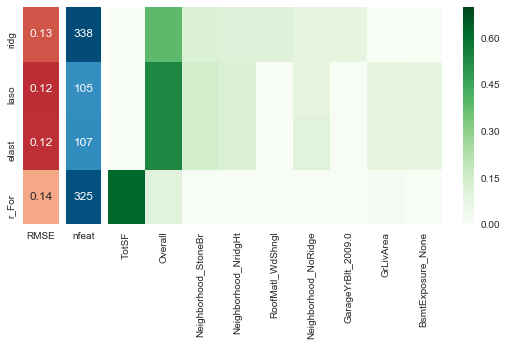

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(9, 4))
gs = gridspec.GridSpec(1, 12)
# gs.update(left=0.25, right=0.48, wspace=0.05)
ax1 = plt.subplot(gs[0, 0])  ###
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2:])  ###
ax1.xaxis.set_ticks_position('top')

# RMSE First
RMSE= pd.DataFrame(m_comp_manFE2, columns=['RMSE'], copy=False)
sns.heatmap(RMSE, cmap='RdGy', vmin=0.11, vmax=0.2, annot=True, square=False, cbar=False, ax = ax1)

# Then n params
empty=['','','','']
nfeat= pd.DataFrame(m_comp_manFE2, columns=['nfeat'], copy=True)
#sns.heatmap(nfeat, cmap='Blues', vmin=20, vmax=400, annot=True, square=False, cbar=False, fmt='g', ax=ax2) #, yticklabels=False)
sns.heatmap(nfeat, cmap='PuBu', vmin= -100, vmax=400, annot=True, square=False,  yticklabels=empty, cbar=False, fmt='g', ax=ax2) #  , yticklabels=False)

#######
# Last by top Features
feats = m_comp_manFE2.iloc[:,2:11]
feats=feats.round(decimals=2)
fsort=feats.T

# Sort by max
# Make sorting index by Max for each row
fsort["max"]=fsort.max(axis=1)
fsort.sort_values('max', inplace=True, ascending = False)
fsort.drop('max', axis=1, inplace=True)
fsortT = fsort.T

# sns.heatmap(feats, cmap='PRGn', annot=True, square=False, cbar=True, fmt='g', ax=ax3, yticklabels=False)
sns.heatmap(feats, cmap='Greens', annot=False, vmin= 0, vmax=0.7, square=False,cbar=True, fmt='g', ax=ax3,yticklabels=False)
plt.yticks(rotation=60)

# Hide some unwanted feats
plt.ylabel("")
plt.xlabel("")
ax.xaxis.tick_top()


In [ ]:
# Heat plot formatting failures
# plt.show()
# ax.set_ylabel('')    
# ax.set_xlabel('')

# for text in ax.texts:
  #   text.set_size(18)
     #text.set_weight('bold')

# fig = plt.figure(figsize=(8, 5)) # Create a new figure
# ax1 = plt.subplot(1, 3, 1) # Create a subplot (returns an axes)
# ax2 = plt.subplot(1, 3, 2) # Create the other subplot (returns an axes)
# ax3 = plt.subplot(1, 3, 3) # Create the other subplot (returns an axes)
#  plt.yticks(rotation=0)

# plt.tight_layout()
# plt.yticks(rotation=45)
# g.set(yticks=[])

# plt.rcParams["axes.labelsize"] = 20
# for ax in plt.gcf().axes:
#    l = ax.get_xlabel()
#     ax.set_xlabel(l, fontsize=20)



# Manual Engineered Features ONLY

In [ ]:
# Assume starting from whole Manual FE process, do not repeat any of this here
# But avaialabile as commented out in Automagic below

In [400]:
houses = load_data('train.csv')
houses = fill_NA(houses)
houses = redefine_category_numeric(houses)
houses = add_new_features(houses)
houses.shape

#houses.columns
 #'Overall', 'Pool', 'Exter', 'Kitchen',
  #     'Garage', 'Fireplace', 'Basement', 'OpenAreaSF', 'TotBath', 'TotSF'],

#man_feats = houses[['Overall','Pool','Exter','Kitchen','Garage','Fireplace','Basement''OpenAreaSF','TotBath','BsmtFullBath']]
man_feats = houses
man_feats.head()


#X, y = split_variable_features(houses)
#X = log_transform_skew(X)
#X = standard_scaling_numeric_features(X)
#X, stdSc, numerical_features = standard_scaling_numeric_features(X)
#X = encode_category_features(X)
#import numpy as np
#y = np.log(y)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Overall,Pool,Exter,Kitchen,Garage,Fireplace,Basement,OpenAreaSF,TotBath,TotSF
0,SC60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,280,0,12,4,9864,0,61.485981,61,3.5,2566
1,SC20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,384,0,9,3,8280,3,49.198098,298,2.5,2524
2,SC60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,280,0,12,4,10944,3,43.695652,42,3.5,2706
3,SC70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,280,0,9,4,5778,4,25.714286,307,2.0,2473
4,SC60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,320,0,12,4,15048,3,46.323144,276,3.5,3343


# Automagic data

In [ ]:
# Autoskew function

In [102]:
def autoskew (houses):
    from scipy.stats import skew
    # find skewed features, log transform
    numeric_feats = houses.dtypes[houses.dtypes != "object"].index

    skewed_feats = houses[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
    skewed_feats = skewed_feats[skewed_feats > 0.5]
    skewed_feats = skewed_feats.index

    houses[skewed_feats] = np.log1p(houses[skewed_feats])
    return houses

In [139]:
# test = autoskew(X)
# test.head()

In [ ]:
# TODO, make function and call, already unmade it.

In [108]:
# Automagic Data
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    # Import
    houses = load_data('train.csv')
    houses = fill_NA(houses)
    X, y = split_variable_features(houses)

    # Automagic 
    X = autoskew(X)
    
    # Both 
    X = encode_category_features(X)
    StandardScaler().fit_transform(X)  # new scaler, after cat features
    y = np.log(y)

    # Manual FE stuff
    # houses = redefine_category_numeric(houses)
    # houses = add_new_features(houses)
    # X = log_transform_skew(X)
    # X = standard_scaling_numeric_features(X)

    # Split X and Y, train, validation
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)
    # automagic = (X_train, X_valid, y_train, y_valid)
    # return automagic

In [112]:
# Re-run ML models, recapture and rename data

ridge=ridge_regression5()
ridge.columns=(["param","ridge"])

lasso = lasso_regression5()
lasso.columns=(["param","lasso"])

elastic = elastic_regression5()
elastic.columns=(["param","elastic"])

rand_for = random_forest5()
rand_for.columns=(["param","rand_forest"])


In [110]:
automagic = automagic()
automagic

TypeError: 'tuple' object is not callable

In [ ]:
# Manual FE

In [ ]:
# Manual only

In [ ]:
# Magic num

In [ ]:
# Select only numeric vars
numeric = X.select_dtypes(exclude = ["object"]).columns

X= X[numeric] # housesT_num.head()

In [ ]:
# Magic cats

In [90]:
# Select only categorical vars
categorical = houses.select_dtypes(include = ["object"]).columns
houses= houses[categorical]
houses.head()

# houses = redefine_category_numeric(houses)
# houses = add_new_features(houses)
# X, y = split_variable_features(houses)
# X=houses
# X = log_transform_skew(X)
# X, stdSc, numerical_features = standard_scaling_numeric_features(X)
# X = encode_category_features(X)
#import numpy as np
#y = np.log(y)

# X.head()
# y.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,CentralAir,Electrical,GarageType,GarageYrBlt,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition
0,SC60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Y,SBrkr,Attchd,2003,Y,None,Feb,2008,WD,Normal
1,SC20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Y,SBrkr,Attchd,1976,Y,None,May,2007,WD,Normal
2,SC60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Y,SBrkr,Attchd,2001,Y,None,Sep,2008,WD,Normal
3,SC70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Y,SBrkr,Detchd,1998,Y,None,Feb,2006,WD,Abnorml
4,SC60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Y,SBrkr,Attchd,2000,Y,None,Dec,2008,WD,Normal


In [ ]:
### Split training and validation

In [ ]:
# Split X and Y, train, validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)
# #standard scaling
# X_train, stdSc_X, numerical_features = standard_scaling_numeric_features(X_train)
# X_valid.loc[:,numerical_features] = stdSc_X.transform(X_valid.loc[:,numerical_features])
# #robust scaling
# X_train, rSc_X, numerical_features = robust_scaling_numeric_features(X_train)
# X_valid.loc[:,numerical_features] = rSc_X.transform(X_valid.loc[:,numerical_features])
# X_train = encode_category_features(X_train)
# X_valid = encode_category_features(X_valid)